In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Polygon

In [101]:
dat_folder = 'data/'
files = ['3-pipelines-byte-policy.txt', '3-pipelines-latency-policy.txt']
header = ['latency', 'size']
column_names = ["Latency (ms)","Size (MB)"]
data = {}
dfs_dict = {}
n_pipelines = 3

for file in files:
    data[file[:-4]] = [[] for _ in range(0,n_pipelines)]
    with open(dat_folder + file, "r") as to_read:
        for l in to_read.readlines():
            pipelines = l.split()
            for i in range(0,n_pipelines):
                x = pipelines[i].split("(")[1].split(",")
                lat,byte = float(x[0]), float(x[1][:-1])
                data[file[:-4]][i] += [(lat,byte)]
        
for scenario in map(lambda s: s[:-4], files):
    dfs_pipelines = [pd.DataFrame(data[scenario][i], columns=column_names) for i in range(0, n_pipelines)]
    dfs_dict[scenario] = dfs_pipelines

# Mobility (Latency-based Policy)

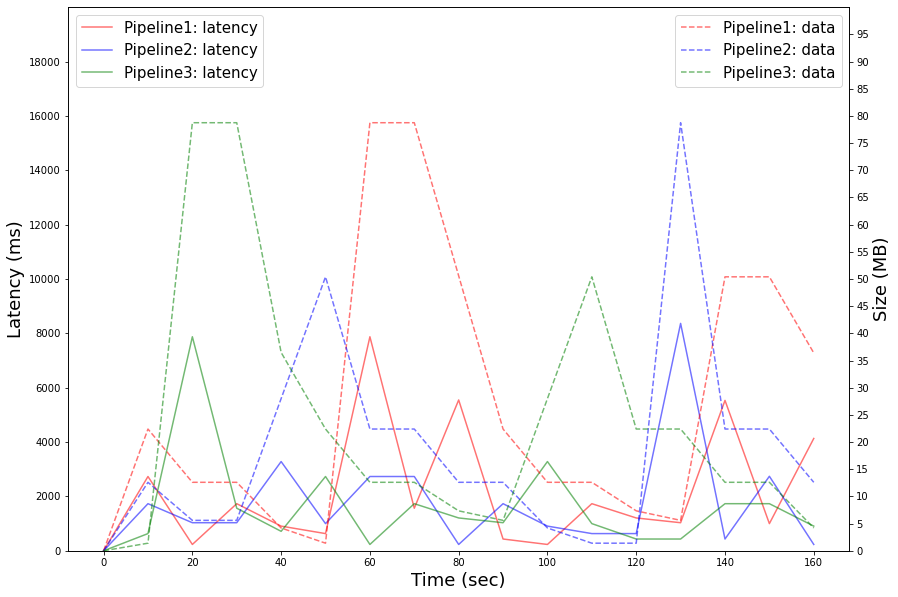

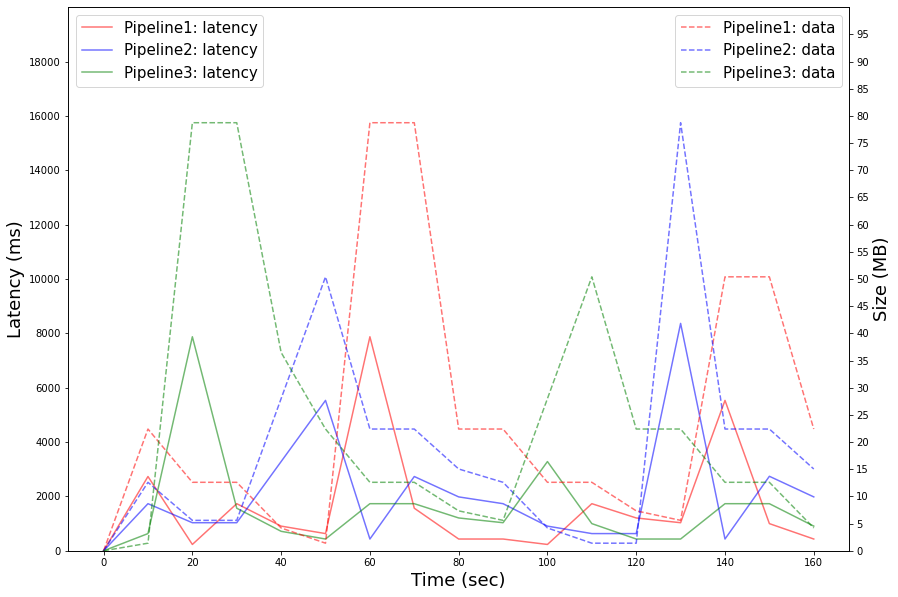

In [108]:
scenarios = ['3-pipelines-latency-policy', '3-pipelines-byte-policy']

x = [i*10 for i in range(0,len(dfs_dict[scenario][0]['Size (MB)']))]

for scenario in scenarios:
    p1_byte = dfs_dict[scenario][0]['Size (MB)']
    p2_byte = dfs_dict[scenario][1]['Size (MB)']
    p3_byte = dfs_dict[scenario][2]['Size (MB)']
    p1_lat = dfs_dict[scenario][0]['Latency (ms)']
    p2_lat = dfs_dict[scenario][1]['Latency (ms)']
    p3_lat = dfs_dict[scenario][2]['Latency (ms)']


    fig = plt.figure(figsize=[14,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()
    ax.grid(False)
    ax_background.grid(False)

    # # define background plot for bytes
    b1 = ax_background.plot(
        x,
        p1_byte, 
        linestyle='dashed', 
        label='Pipeline1: data', 
        color='red', 
        zorder=100, 
        alpha=.55
    )

    b2 = ax_background.plot(
        x,
        p2_byte, 
        linestyle='dashed', 
        label='Pipeline2: data', 
        color='blue', 
        zorder=100, 
        alpha=.55
    )

    b3 = ax_background.plot(
        x,
        p3_byte, 
        linestyle='dashed', 
        label='Pipeline3: data', 
        color='green', 
        zorder=100, 
        alpha=.55
    )


    # #####latency#####

    l1 = ax.plot(
        x,
        p1_lat, 
        linestyle='solid', 
        label='Pipeline1: latency', 
        color='red', 
        zorder=1, 
        alpha=.55
    )

    l2 = ax.plot(
        x,
        p2_lat, 
        linestyle='solid', 
        label='Pipeline2: latency', 
        color='blue', 
        zorder=1, 
        alpha=.55
    )

    l3 = ax.plot(
        x,
        p3_lat, 
        linestyle='solid', 
        label='Pipeline3: latency', 
        color='green', 
        zorder=1, 
        alpha=.55
    )


    # set ticks and labels
    ax.set_xlabel('Time (sec)', fontsize=18)


    # background ticks and labels
    ax.set_yticks(range(0, 20000, 2000))
    ax_background.set_yticks(range(0, 100, 5))
    ax.set_ylim(-.0001, 20000)
    ax_background.set_ylim(-.0001, 100)
    ax.set_ylabel('Latency (ms)', fontsize=18)
    ax_background.set_ylabel('Size (MB)', fontsize=18)

    # legend settings
    ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=15)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=15)
    
    fig.savefig(f'images/{scenario}.pdf', dpi=100)

In [107]:
for scenario in scenarios:
    print("###" + scenario + "###")
    mean_area = 0
    for i in range(0,len(dfs_dict[scenario])):
        area = np.trapz(dfs_dict[scenario][i]['Latency (ms)'], dx=5)
        mean_area += area
        print("PIPELINE " + str(i) + " AUC = " + str(area) + ", AVG Latency = " + str(sum(dfs_dict[scenario][i]['Latency (ms)'] / len(dfs_dict[scenario][i]['Latency (ms)']))))
        
    print("MEAN AUC: " + str(mean_area / len(dfs_dict[scenario])))

###3-pipelines-latency-policy###
PIPELINE 0 AUC = 172375.0, AVG Latency = 2149.5098039215686
PIPELINE 1 AUC = 146750.0, AVG Latency = 1733.3333333333335
PIPELINE 2 AUC = 134020.83333333334, AVG Latency = 1603.43137254902
MEAN AUC: 151048.61111111112
###3-pipelines-byte-policy###
PIPELINE 0 AUC = 137541.66666666666, AVG Latency = 1630.8823529411764
PIPELINE 1 AUC = 171041.66666666666, AVG Latency = 2070.588235294118
PIPELINE 2 AUC = 130020.83333333334, AVG Latency = 1556.372549019608
MEAN AUC: 146201.38888888888
